In [129]:
# Importing all libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv'

In [118]:
# load image
image = cv2.imread('layouts/test2.png')
image2 = image.copy()
cv2.imshow('Layout scan', image)
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# thresholding image
ret, thresh = cv2.threshold(gray, 15, 255, 0)
kernel = np.ones((200,70), np.uint8)
#thresh = cv2.dilate(thresh, kernel, iterations = 1)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel1 = np.ones((8,8), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel1)
cv2.imshow('thresholded layout', thresh)


#Finding contours
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image2, contours, -1, (0,255,255), 1)
cv2.imshow('cnt', image2)

length = len(contours)
cont = np.vstack(contours[i] for i in range(length))

hull = cv2.convexHull(cont)
#epsilon = 0.009 * cv2.arcLength(cont, True)
#approx = cv2.approxPolyDP(cont, epsilon, closed=False)
cv2.drawContours(image, [hull], -1, (156,221,21),2)
#cv2.drawContours(image, [approx], -1, (0,255,255),2)
cv2.namedWindow('finalImg', cv2.WINDOW_NORMAL)
cv2.imshow("finalImg",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\koush\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [141]:
# load image
image = cv2.imread('layouts/test2.png')

cv2.namedWindow('layout', cv2.WINDOW_NORMAL)
cv2.imshow('layout', image)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# thresholding image
ret, thresh = cv2.threshold(gray, 15, 255, 0)
kernel = np.ones((9,9), np.uint8)
#thresh = cv2.erode(thresh, None, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations = 4)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel1 = np.ones((4,4), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel1)
cv2.namedWindow('threshold', cv2.WINDOW_NORMAL)
cv2.imshow('threshold', thresh)

#Finding contours
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
length = len(contours)
cont = np.vstack(contours[i] for i in range(length))
print(thresh.shape)
print(np.max(thresh))
#thresh = cv2.merge([thresh,thresh,thresh])
thresh = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB) 
hull = cv2.convexHull(cont)
#epsilon = 0.009 * cv2.arcLength(cont, True)
#approx = cv2.approxPolyDP(cont, epsilon, closed=False)
cv2.drawContours(thresh, [hull], -1, (156,221,21),2)
#cv2.drawContours(image, [approx], -1, (0,255,255),2)
cv2.namedWindow('finalImg', cv2.WINDOW_NORMAL)
cv2.imshow("finalImg",thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\koush\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


(1316, 1869)
255


In [51]:
def angle_ABC(a, b, c):
    
    """ angle_ABC returns angle in degrees,
    it requires three points a - b - c and returns angle for point b """
    
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def find_bad_dists(hull, distance = 10):
    """Seach for distances between consecutive two points in contour and returns mask of point that is to close to the next"""
    mask = []
    points, _, _ = hull.shape

    for i in range(points):
        # determine points to compare and make sure that last and first are compared too
        ai = i
        bi = (i+1)%points
        # x, y for both points
        x1 = hull[ai][0][0]
        y1 = hull[ai][0][1]
        x2 = hull[bi][0][0]
        y2 = hull[bi][0][1]
        
        #distance 
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 )
        #build mask with distances out ot range
        if dist < distance:
            print('point nr =', bi, ' -> distance =',dist)
            mask.append(bi)
    return mask
    
    

def find_bad_angles(hull, acute_angle = 30, obtuse_angle = 140):
    """Seach for angles between points in contour and returns mask of contours smaller than acute and larger than obtuse"""
    mask = []
    points, _, _ = hull.shape

    for i in range(points):
        # determine points to compare angle and make sure that last and first are compared too
        ai = i
        bi = (i+1)%points
        ci = (i+2)%points

        #print('ai = ', ai,'bi = ',bi, 'ci = ', ci)
        #selecting points for angle
        a = hull[ai][0]
        b = hull[bi][0]
        c = hull[ci][0]
        
        #obtain angles        
        angle = angle_ABC(a, b, c)
        #print(angle, bi)
        #build mask with angles out ot range
        if angle > obtuse_angle or angle < acute_angle:
            print('point nr =', bi, ' -> angle =',angle)
            mask.append(bi)
    return mask

def mark_points(hull):
    """plots circles of diggerent sizes and colors around points for visual examination, 
    if points are ovelaping it will be reviled by different size of circels in the same place"""
    points, _, _ = hull.shape
    
    for i in range(points):
        r = int(np.random.randint(100,255,1)[0])
        g = int(np.random.randint(100,255,1)[0])
        b = int(np.random.randint(100,255,1)[0])

        cv2.circle(image, (hull[i][0][0], hull[i][0][1]) , np.random.randint(10,20,1)[0], (r,g,b), 2)

point nr = 0  -> distance = 1.0
point nr = 2  -> angle = 164.3427195956838
point nr = 3  -> angle = 163.5038004677956
point nr = 4  -> angle = 148.07989310236496
point nr = 5  -> angle = 172.47837556260748


C:\Users\koush\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Text(0.5, 1.0, 'AFTER')

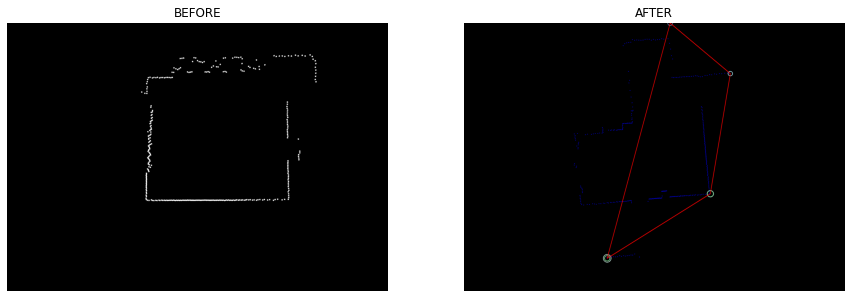

In [67]:
# load image
img = cv2.imread('layouts/test3.png')
image2 = img.copy()
cv2.imshow('Layout scan', img)
# Grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# thresholding image
ret, thresh = cv2.threshold(gray, 15, 255, 0)
kernel = np.ones((200,70), np.uint8)
#thresh = cv2.dilate(thresh, kernel, iterations = 1)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
kernel1 = np.ones((8,8), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel1)
cv2.imshow('thresholded layout', thresh)

#Finding contours
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
length = len(contours)

#image =  img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB) 


#size of contour points
length = len(contours)

# here filtering shapes

#concatinate poits form all shapes into one array
cont = np.vstack(contours[i] for i in range(length))

#looking now for four corners

#filter down irreleveant poits
cnt_len = cv2.arcLength(cont, True)
cont = cv2.approxPolyDP(cont, .01*cnt_len, True)
hull = cv2.convexHull(cont)


#filter out poits that are to close to each other
mask = find_bad_dists(hull)
hull = np.delete(hull, mask, axis=0)


#filter out bad corneres, if they are beteween 120-180
#they are random points in the middle of edge 
mask = find_bad_angles(hull)
hull = np.delete(hull, mask, axis=0)


#higlight poits
mark_points(hull)
        
uni_hull = []
uni_hull.append(hull) # <- array as first element of list
cv2.drawContours(image,uni_hull,-1,255,2);


# fombined figure
fig=plt.figure(figsize=(15, 8))
columns = 2
rows = 1
fig.add_subplot(1, 2, 1)
plt.imshow(img_raw, cmap='gray')
plt.axis('off')
plt.title('BEFORE')

fig.add_subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
plt.title('AFTER')


## 